In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import random 

pi = np.pi
print("imports work")


imports work


In [2]:
# expressing the relation between qbit and its matrix
def quvec(a):
    exp = 0
    b = np.zeros([2**len(a)])
    for i in range(len(a)):
        exp += (a[-i-1])*(2**i) # -i-1 gives the values from the end of the array
    b[exp] = 1
    return b


In [3]:
for i in range(2):
    print("hi")

hi
hi


In [22]:
v = [0,0,1,1]
u = [1,0,0,0]
psi = quvec(u)+quvec(v)
psi

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
# define the base for a vector represntation of qubit
def ket_base(index, L):
    n = int(np.log2(L))
    b = np.zeros(n)
    for i in range(n):
        b[-i-1] = index % 2
        index = index//2
    return b

# print the base as kets
def as_string_index(index, L):
    ket = [str(int(i)) for i in ket_base(index, L)]
    return f"|{','.join(ket)}>"

# print the components of a vector in the base presentation
def ket(psi):
    kets = [as_string_index(i, len(psi)) for i in range(len(psi))]
    return [' + '.join([f'{psi[i]} {kets[i]}' for i in range(len(psi)) if psi[i] != 0])]

# print (ket([2, 1, 1, 0]))

In [6]:
# 2_D operators and important states
# Pauli
Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
I = np.array([[1,0],[0,1]])

# Clifford
H = 1/np.sqrt(2) * np.array([[1,1],[1,-1]])
S = np.array([[1j,0],[0,-1j]])
T = np.array([[1,0],[0,np.exp((1j*pi)/4)]])

# X base
plus = (quvec([0]) + quvec([1]))/np.sqrt(2)
minus = (quvec([0]) - quvec([1]))/np.sqrt(2)

# bell states



In [7]:
# function to operate gates on a state
def operate(operators, psi):
    vec_psi = quvec(psi)
    for i in range(len(operators)):
        vec_psi = np.matmul(operators[-i-1], vec_psi)
    return vec_psi

In [8]:
# creat n dimension gates
def n_d_gates(operators):
    gate = operators[-1]
    for i in range(len(operators)-1):
        gate = np.kron(operators[-i-2],gate)
    return gate


In [9]:
# apply general operators on a general qubit
def general_operate(gates,qvec): # gates is a list of gates and theis indices, i.e [X,0,Y,2] will apply X on the 0th qubit and Y on the 2nd
    # the first qubit index is 0
    init_gate = [I]*(int(np.log2(len(qvec))))
    i = 1
    while i <= len(gates):
        init_gate[gates[i]] = gates[i-1]
        i += 2
    final_gate = n_d_gates(init_gate)
    a = np.matmul(final_gate,qvec)
    # a = operate([final_gate], qvec)
    return a

In [10]:
psi = [1,0,0,1,0,0]
psi_1 = general_operate([Z,0,X,3], quvec(psi))
print ("psi_1 =", ket(psi_1))


psi_1 = ['-1.0 |1,0,0,0,0,0>']


- create loop for operators

- create function for operators and qubits W.O defining the n dimensions function each time

- Neel states

- projective measurements, understand how to create them. see which one is more applied.

next time:
- learn how to calculate entanglement.

In [11]:
# normalize a state
def norm(qvec):
    qvec_size = np.matmul(np.conj(qvec),qvec)
    normalized_state = (qvec)/np.sqrt(qvec_size)
    return normalized_state
    
#8 this function takes a state in superposition of base vectors and return only one, considering probabilities
def measure_probability(state):       # state should be an array - vector
    final_state = np.zeros(len(state))
    outcomes = list(range(0,len(state)))
    probabilities = norm(state)
    measurment = random.choices(outcomes, weights=probabilities, k=1)
    final_state[measurment[0]] = 1
    return final_state


In [12]:
# measure speific qubit in specific  state

def tensor_exponent(tensor,power):
    i = 1
    if power != 0:
        power_tensor = tensor
        while i < power:
            power_tensor = np.kron(tensor, power_tensor)
            i += 1
    else:
        power_tensor = 1
    return power_tensor


def index_vector(spin,location,dimension): 
    plus = [1,1]
    index_psi0 = np.kron(tensor_exponent(plus,location), quvec([spin]))
    index_psi = np.kron(index_psi0, tensor_exponent(plus,dimension-1-location))
    return index_psi

def collapse(spin,location,state): #spin is a number (0 or 1), location is the wanted place to measure spin from 0 to n-1, state in vector form
    dimension = np.log2(len(state))
    index_psi = index_vector(spin,location,dimension)
    probability_vec = index_psi * norm(state)
    probability = np.matmul(np.conj(probability_vec), probability_vec)
    collapsed = norm(measure_probability(probability_vec))
    return probability, norm(probability_vec), collapsed



In [13]:
i = 1
j = 1
k = 1

state = (i*quvec([1,0,1]) + j*quvec([1,0,0]) + k*quvec([0,0,1]))
a, b, c = collapse(0,1,state) #first is spin. second is cite, starting from 0.
print("probability:", a,"\n", "result:", ket(b))


probability: 1.0000000000000002 
 result: ['0.5773502691896258 |0,0,1> + 0.5773502691896258 |1,0,0> + 0.5773502691896258 |1,0,1>']


- create histograms to show the outcomes of over many measurements

- create measurement option for different bases

- measure multiple qubits in certain state

- collapsed state is unnecessary

- more than one cite measurments, start with neighboring cites

Measurements

In [14]:
# working measurement for 2d
def bias_coin(A , B , p):
    r = random.random()  # Generates a random float between 0 and 1
    if r < p:
        return A
    else:
        return B
    
#  binomial bias coin  
# pr=random.choices([1,-1], cum_weights = [pc,1], k = L)

def observation_value(operator, state): #for pauli, observation ranges between -1 and 1 due to eigenvalues
    a = norm(state)
    b = np.matmul(operator,a) # O|v>
    c = np.conj(a) # <v|
    d = np.round(np.matmul(c,b), 10) # <v|O|v>, rounding is for values close to zero to be zero
    return d

def projector(operator, eigenvalue):
    proj = (I + eigenvalue * operator)/2
    return proj
    
    
def Measure_2d(operator, state):
    state = norm(state)
    p = (observation_value(operator,state) + 1)/2 # Changes <O> range from {-1,1} to {0,1}
    eigenvalue = bias_coin(1, -1, p) 
    proj = projector(operator, eigenvalue)
    return norm(np.matmul(proj, state)) , np.real(p)




In [15]:
    
def Measure(operator, state, site):
    dimension  = int(np.log2(len(state)))
    operator_site = [I]*(site) + [operator] + [I]*(dimension-site-1) #operator list for O in the site place 
    operator_n = n_d_gates(operator_site) # operator of O in the site place, for all the other sites its identity 

    p = (observation_value(operator_n,state) + 1)/2 # Changes <O> range from {-1,1} to {0,1}
    eigenvalue = bias_coin(1, -1, p) #choose eigenvalue biased by the observation value result
    
    proj_1d = projector(operator, eigenvalue) # define the 2d projector based on the chosen eigenvalue
    proj = n_d_gates([I]*(site) + [proj_1d] + [I]*(dimension-site-1)) # create operator to project on the wanted site
    return norm(np.matmul(proj, state)) , np.real(p), 1-np.real(p)


In [16]:
a , b = Measure_2d(Z, (quvec([1]) - quvec([0]))/np.sqrt(2))

print("state:", a, "P:", b)

state: [0. 1.] P: 0.5


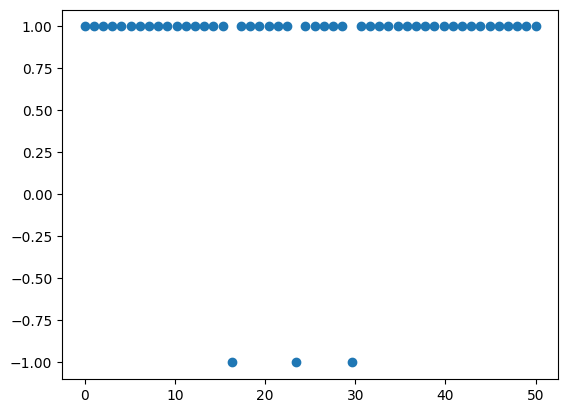

In [17]:
# a = choose_weighted(1,-1,0.9)
# a
R = []
    
for i in range(50):
    R.append(bias_coin(1,-1,0.9))

# print(R)

# np.histogram(R)
plt.scatter(np.linspace(0, len(R), 50),R)
# plt.show()
# plt.plot(np.linspace(0, len(R), 1000) ,R)


In [18]:
# v = norm(quvec([1,1,0,1,0])+quvec([1,0,0,0,0]))
# v = norm(quvec([1,1,0,1,0]))
v = norm(quvec([0]))

a, b ,c = Measure(X,v,0)
print("measured",ket(a),"p+", b ,"p-", c)


measured ['0.7071067811865475 |0> + 0.7071067811865475 |1>'] p+ 0.5 p- 0.5


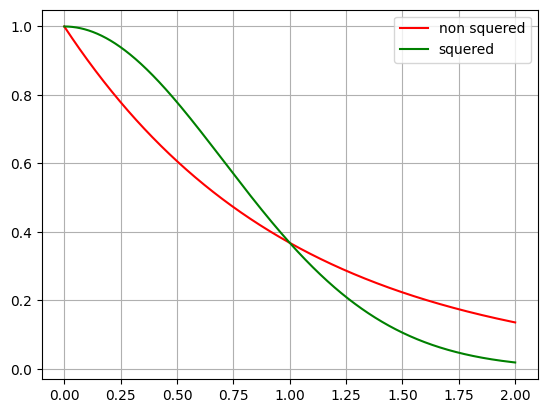

In [ ]:
x = np.linspace(0, 2, 1000)
y = np.exp(-x)
z = np.exp(-x**2)
plt.plot(x,y,'r', label = 'non squered')
plt.plot(x,z,'g', label = 'squered')
plt.grid(True)
plt.legend()
plt.show()